<a href="https://colab.research.google.com/github/Rushabhbhagat08/Graduate-Admissions-from-an-Indian-perspective/blob/main/Graduate_Admissions_from_an_Indian_perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>**Project name: Graduate Admissions from an Indian perspective**</u>

**Project Summery:**

#Problem statment

#Let's Begin !

In [1]:
# import some library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [ ]:
# read the data
student_data=pd.read_csv("/content/drive/MyDrive/InternSavy/Graduate Admissions from an Indian perspective/Admission_Predict_Ver1.1.csv")

In [ ]:
# print first 5 rows
student_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#print last 5 rows
student_data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
#Dataset shape and size
rows=student_data.shape[0]
columns=student_data.shape[1]
print(f"The number of rows is {rows} and number of columns is {columns}.")

The number of rows is 500 and number of columns is 9.


In [ ]:
# information of the dataset
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# see the null or missing values
student_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

1. isnull is the function check for the null values in the dataset
2. sum is the function gives the total number of missing or NaN values in the columns
3. There are no missing or null values in the dataset

In [ ]:
# count the unique value in the dataset
student_data['Serial No.'].value_counts()

1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No., Length: 500, dtype: int64

#Understand the dataset

In [ ]:
# description of the dataset
student_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


##Varible Description

In [ ]:
# see the columns in tha dataset
student_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

#Exploratory Data Analysis(EDA)

<Axes: >

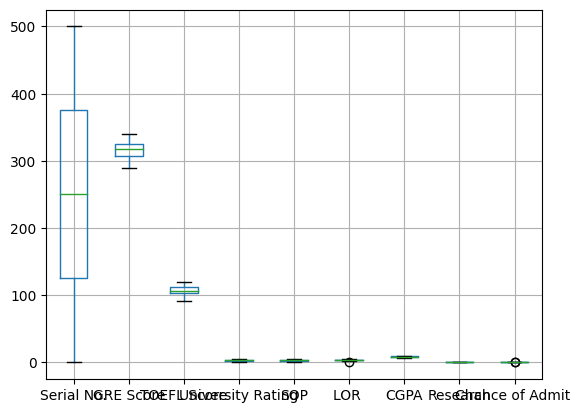

In [ ]:
# plot the boxplot for for check outluers
student_data.boxplot()

<Axes: >

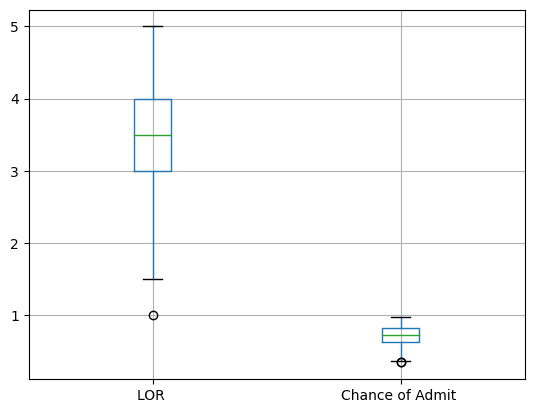

In [ ]:
# plot boxplot for for two columns
student_data.boxplot(column=['LOR ','Chance of Admit '])

From the Boxplots is the evidant that LOR and Chance of Admit have the outliers values.

##Removing outliers using IQR method


In [ ]:
# droping serial no. column from the dataset not required for the prediction
data=student_data.copy()
data.drop(['Serial No.'],axis=1, inplace=True)

In [ ]:
# Calculate Quartile Of each feature
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [ ]:
#identity the outliers from the dataset
df_out=data[((data < (Q1-1.5*IQR))| (data >(Q3+1.5*IQR))).any(axis=1)]
df_out.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


There Are three outliers shown above

In [ ]:
# removing Outliers from the data
df_out=data[~((data < (Q1-1.5*IQR))| (data >(Q3+1.5*IQR))).any(axis=1)]
student_data=df_out.copy()
print(student_data.shape)

(497, 8)


Text(0.5, 0, 'Chances')

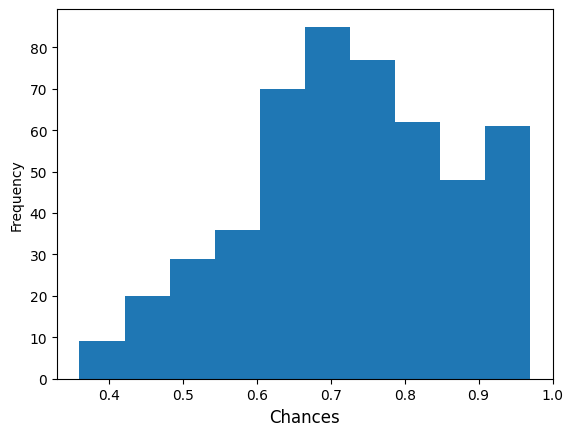

In [ ]:

student_data['Chance of Admit '].plot.hist()
plt.xlabel("Chances",fontsize=12)

Text(0.5, 0, 'Rating')

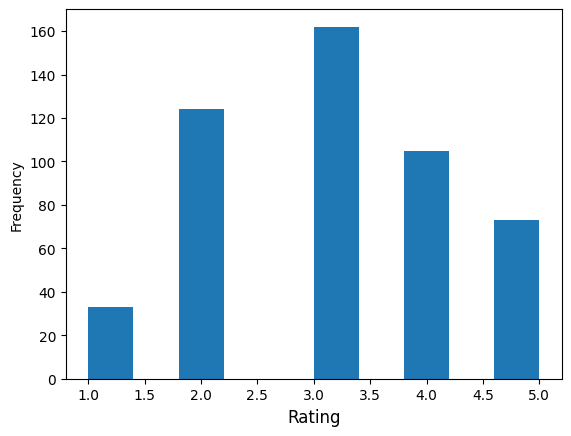

In [ ]:

student_data['University Rating'].plot.hist()
plt.xlabel('Rating',fontsize=12)

1. less number of student have less rating.
2. maximum student getting rating between 3 to 3.5.

In [ ]:

student_data['Research'].value_counts()

1    280
0    217
Name: Research, dtype: int64

280 student have Reserch experince and 217 student student haven't.

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

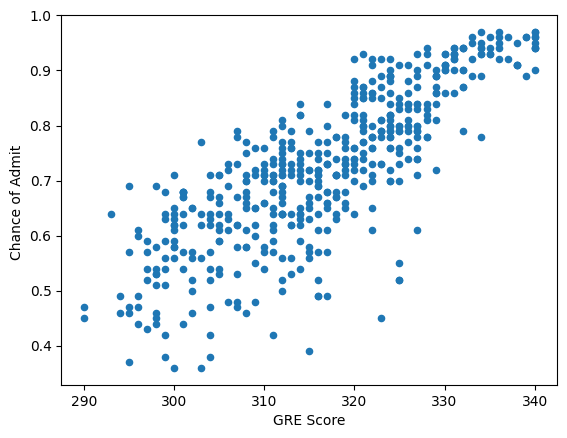

In [ ]:

student_data.plot.scatter('GRE Score','Chance of Admit ')

In [ ]:

student_data['GRE Score'].corr(student_data['Chance of Admit '])

0.80759358658696

1. GRE score has strong positive correlation with target varible.
2. More the GRE score, More possibility to admit.

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

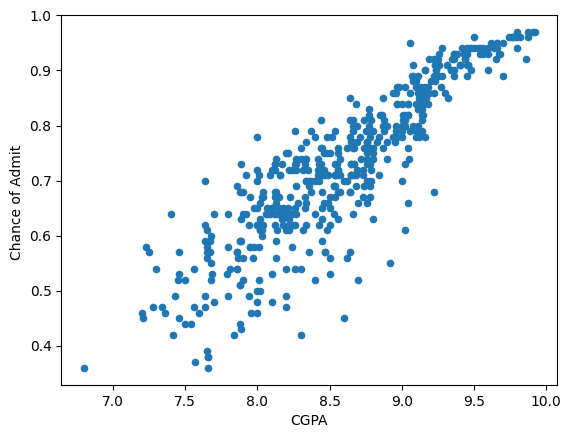

In [ ]:

student_data.plot.scatter('CGPA','Chance of Admit ')

In [ ]:

student_data['CGPA'].corr(student_data['Chance of Admit '])

0.8831214773197416

1. Maximum CGPA Define the chance of admit

In [ ]:

student_data['TOEFL Score'].corr(student_data['CGPA'])

0.8072817048403574

In [ ]:
student_data['CGPA'].corr(student_data['GRE Score'])

0.823738728738834

1. Compare to the GRE, TOFEL is less correlation with Chance of Admit.
2. TOFEL Score also having Positive Correlaion with Chance of Admit.
3. More the CGPA, Student definately get a good score in GRE and TOFEL.

#ML model Implementation

##*Feature Engineering & Data Pre-processing*

In [ ]:
#preprocing independent and dependent varibles
x=student_data.drop(['Chance of Admit '],axis=1)
y=student_data['Chance of Admit ']
x.shape,y.shape

((497, 7), (497,))

In [ ]:
#importing the train test split function
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error,accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=10)
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((100, 7), (100,), (397, 7), (397,))

## *Decision Tree Algorithm*

In [ ]:
#decision tree implementation
from sklearn.tree import DecisionTreeRegressor
est_dt = DecisionTreeRegressor( max_depth=10)
est_dt.fit(x_train, y_train)
dt_pred = est_dt.predict(x_test)
print(dt_pred)

[0.91       0.9        0.76       0.775      0.83       0.85
 0.835      0.97       0.8        0.63285714 0.71       0.685
 0.91       0.73       0.49       0.71       0.835      0.95
 0.79       0.54       0.71       0.69       0.625      0.717
 0.62       0.96       0.63285714 0.465      0.68       0.79
 0.85       0.64       0.77       0.61       0.535      0.87
 0.70333333 0.59       0.68       0.665      0.8        0.67666667
 0.78       0.79785714 0.97       0.36       0.79785714 0.79785714
 0.94111111 0.71       0.88       0.64       0.535      0.785
 0.95       0.62       0.97       0.576      0.91       0.77
 0.76       0.91       0.61       0.48       0.9        0.96
 0.74       0.717      0.63285714 0.64       0.94111111 0.70333333
 0.64       0.576      0.79       0.59333333 0.71       0.63285714
 0.93       0.62       0.717      0.8        0.70333333 0.88
 0.75       0.79       0.62       0.64       0.73       0.94111111
 0.74       0.64       0.91       0.74       0.685  

### *Score Evaluton in ML*

1. <u>Training Score:</u> How the model generalized or fitted in the training data. If the model fits so well in a data with lots of variance then this causes over-fitting. This causes poor result on Test Score. Because the model curved a lot to fit the training data and generalized very poorly. So, generalization is the goal.


2. <u>Validation Score:</u> This is still a experimental part. We keep exploring our model with this data-set. Our model is yet to call the final model in this phase. We keep changing our model until we are satisfied with the validation score we get.

3. Cross Validation Score: Cross-validation (CV) is a technique used to assess a machine learning model and test its performance (or accuracy). It involves reserving a specific sample of a dataset on which the model isn't trained. Later on, the model is tested on this sample to evaluate it.

5. RMSLE Score:

In [ ]:
#decision tree scores check
print ("Training Score : " , est_dt.score(x_train, y_train))

print ("Validation Score : ", est_dt.score(x_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, x_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))


# print("Accuracy score", accuracy_score(dt_pred,y_test))
# est_dt.accuracy_score(dt_pred,y_test)

Training Score :  0.9868548277486481
Validation Score :  0.6861749905679632
Cross Validation Score :  0.637884761515627
R2_Score :  0.69447703569225
RMSLE :  0.04522185228557061


##*Random Forest Regressor Algorithm*

In [ ]:
#implementation of forest algorithm

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor( n_estimators=5, max_depth=10)
est_rf.fit(x_train, y_train)
rf_pred = est_rf.predict(x_test)
rf_pred

array([0.914     , 0.89      , 0.74      , 0.75133333, 0.768     ,
       0.85      , 0.8215    , 0.96      , 0.80408333, 0.65317949,
       0.6945    , 0.65083333, 0.84975   , 0.494     , 0.536     ,
       0.735     , 0.832     , 0.95      , 0.79148333, 0.629     ,
       0.70442308, 0.78419048, 0.594     , 0.66734615, 0.64717812,
       0.964     , 0.69333333, 0.464     , 0.7       , 0.81748333,
       0.836     , 0.64152   , 0.772     , 0.65507692, 0.568     ,
       0.832     , 0.562     , 0.622     , 0.59190909, 0.71690909,
       0.82648333, 0.66117714, 0.8094    , 0.7941    , 0.964     ,
       0.48272727, 0.826     , 0.81126667, 0.938     , 0.688     ,
       0.84      , 0.68203429, 0.56      , 0.78467143, 0.944     ,
       0.66658333, 0.97      , 0.618     , 0.894     , 0.6928    ,
       0.732     , 0.914     , 0.664     , 0.57228571, 0.894     ,
       0.964     , 0.68825   , 0.65133333, 0.69908858, 0.61932   ,
       0.922     , 0.657     , 0.65028923, 0.51901299, 0.728  

In [ ]:
#examining metrics of forest algorithm

print ("Training Score : " , est_rf.score(x_train, y_train))

print ("Validation Score : ", est_rf.score(x_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, x_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9468268591991997
Validation Score :  0.6714269445374597
Cross Validation Score :  0.7552731529700656
R2_Score :  0.6527465651068537
RMSLE :  0.04642774522770157


###*R2 Scores Evaluation*

* R2 Score or R-Squared is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

* Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Text(0.5, 1.0, 'CV score')

<Figure size 800x700 with 0 Axes>

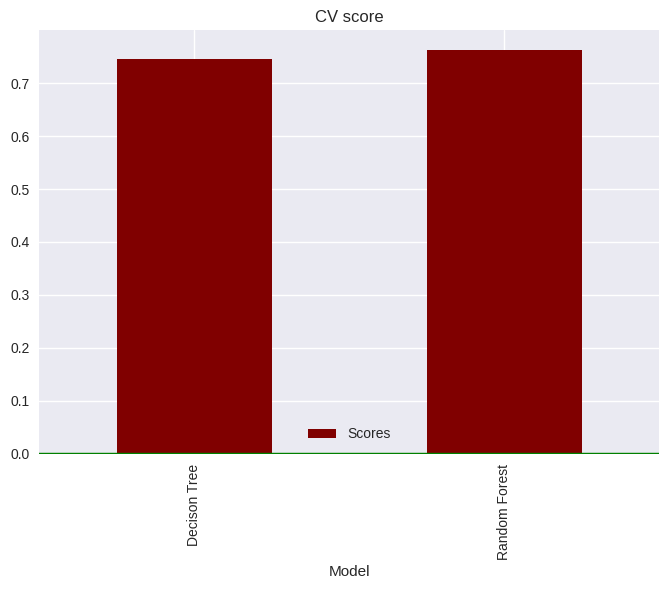

In [ ]:
#r2 score plot for all 3 models
plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'Scores':np.array([ (cross_val_score(est_rf, x_train, y_train, cv=5).mean()),  cross_val_score(est_rf, x_train, y_train, cv=5).mean()]), 'Model':np.array([ 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="maroon")
plt.axhline(y=0, color='g')
plt.title("CV score")

* Although , our Evaluation Metric isn't R2 Score but I'm just plotting them to check the Not bad.

* We're getting good fit score for Decision Tree and Random Forest , i.e, close to 1.0